<a href="https://colab.research.google.com/github/plaban1981/FASTAI_2021/blob/main/Mosquito_Landing_Detection_with_FastAI_Image_Classifier_FastAI_Course_Hands_on_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import google drive

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Import Fastai vison libraries

In [4]:
from fastai.vision.all import *

## Image url

In [5]:
url = 'https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/zw4p9kj6nt-2.zip'

## unzip the data and store it to path variable using untar_data fastai helper function

In [6]:
path = untar_data(url)

In [8]:
path

Path('/root/.fastai/data/zw4p9kj6nt-2')

In [7]:
path.ls()

(#7) [Path('/root/.fastai/data/zw4p9kj6nt-2/Aedes aegypti landing'),Path('/root/.fastai/data/zw4p9kj6nt-2/Aedes aegypti smashed'),Path('/root/.fastai/data/zw4p9kj6nt-2/Aedes albopictus smashed'),Path('/root/.fastai/data/zw4p9kj6nt-2/data_splitting'),Path('/root/.fastai/data/zw4p9kj6nt-2/Culex quinquefasciatus smashed'),Path('/root/.fastai/data/zw4p9kj6nt-2/Aedes  albopictus landing'),Path('/root/.fastai/data/zw4p9kj6nt-2/Culex quinquefasciatus landing')]

In [17]:
 Path(path/'data_splitting/Train').ls()

(#6) [Path('/root/.fastai/data/zw4p9kj6nt-2/data_splitting/Train/albopictus smashed'),Path('/root/.fastai/data/zw4p9kj6nt-2/data_splitting/Train/albopictus landing'),Path('/root/.fastai/data/zw4p9kj6nt-2/data_splitting/Train/Culex smashed'),Path('/root/.fastai/data/zw4p9kj6nt-2/data_splitting/Train/aegypti landing'),Path('/root/.fastai/data/zw4p9kj6nt-2/data_splitting/Train/aegypti smashed'),Path('/root/.fastai/data/zw4p9kj6nt-2/data_splitting/Train/Culex landing')]

## Create a folder - images (Linux based approach)

In [10]:
! mkdir 'images'

#### Create a subfolder smashed and then copy images pertaining to the samshed mosquito into images/smashed folder

In [12]:
! mkdir './images/smashed' && cp -R '/root/.fastai/data/zw4p9kj6nt-2/data_splitting/Train/albopictus smashed' './images/smashed'

#### Create a subfolder landing and then copy images pertaining to the samshed mosquito into images/smashed folder

In [13]:
! mkdir './images/landing' && cp -R '/root/.fastai/data/zw4p9kj6nt-2/data_splitting/Train/albopictus landing' './images/landing'

In [15]:
import os
print(len(os.listdir('/content/images/landing/albopictus landing')))

700


In [16]:
print(len(os.listdir("/content/images/smashed/albopictus smashed")))

700


In [19]:
!ls './images'

landing  smashed


In [20]:
path = './images'

## Build Datablock

In [22]:
dls = DataBlock(
    blocks = (ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2,seed=332),
    get_y = parent_label,#comes from root folder name
    item_tfms = [Resize(224,method='squish')]
)

In [23]:
dls = dls.dataloaders(path)

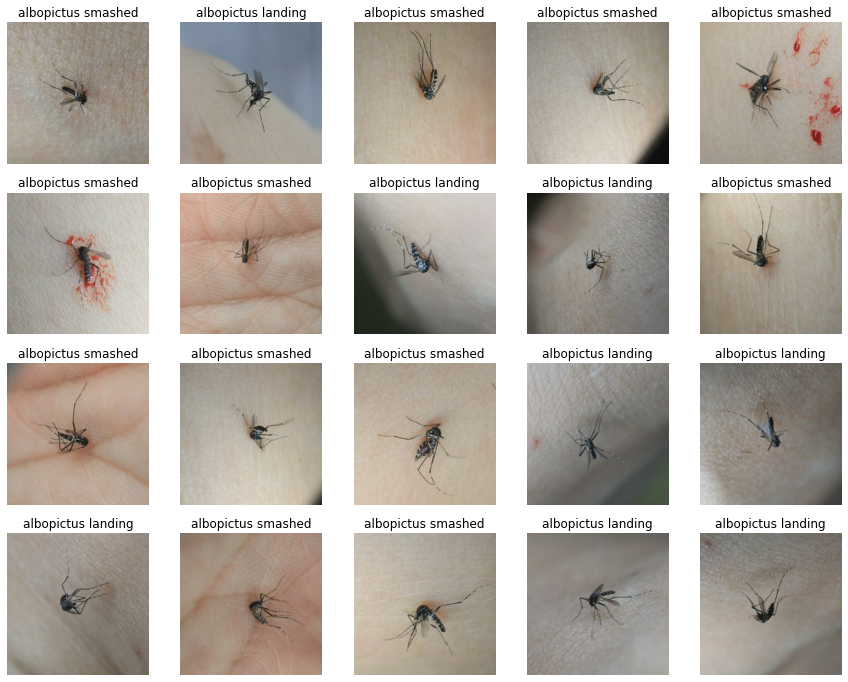

In [25]:
dls.show_batch(max_n=20)

## Build vision learner

In [26]:
learner = vision_learner(dls,resnet50,metrics=[accuracy,error_rate])

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [65]:
learner.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.013515,0.061808,0.982143,0.017857,00:05


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.003036,0.078813,0.975000,0.025000,00:06
1,0.054638,0.231492,0.964286,0.035714,00:06
2,0.058233,0.092772,0.982143,0.017857,00:07
3,0.040726,0.088323,0.964286,0.035714,00:06


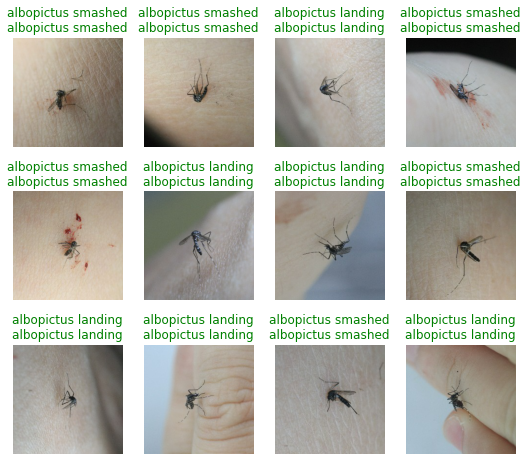

In [66]:
learner.show_results(max_n=12,figsize=(9,8))

## Explore test images

In [67]:
path

'./images'

In [37]:
!ls '/root/.fastai/data/zw4p9kj6nt-2/data_splitting/Test/albopictus smashed'

'105 - Copy.jpg'   330.jpg	    '564 - Copy.jpg'   775.jpg
 105.jpg	  '341 - Copy.jpg'   564.jpg	      '776 - Copy.jpg'
'116 - Copy.jpg'   341.jpg	    '565 - Copy.jpg'   776.jpg
 116.jpg	  '34 - Copy.jpg'    565.jpg	      '787 - Copy.jpg'
'117 - Copy.jpg'   34.jpg	    '575 - Copy.jpg'   787.jpg
 117.jpg	  '352 - Copy.jpg'   575.jpg	      '798 - Copy.jpg'
'11 - Copy.jpg'    352.jpg	    '57 - Copy.jpg'    798.jpg
 11.jpg		  '353 - Copy.jpg'   57.jpg	      '801 - Copy.jpg'
'128 - Copy.jpg'   353.jpg	    '587 - Copy.jpg'   801.jpg
 128.jpg	  '357 - Copy.jpg'   587.jpg	      '806 - Copy.jpg'
'141 - Copy.jpg'   357.jpg	    '588 - Copy.jpg'   806.jpg
 141.jpg	  '364 - Copy.jpg'   588.jpg	      '811 - Copy.jpg'
'142 - Copy.jpg'   364.jpg	    '598 - Copy.jpg'   811.jpg
 142.jpg	  '371 - Copy.jpg'   598.jpg	      '818 - Copy.jpg'
'152 - Copy.jpg'   371.jpg	    '5 - Copy.jpg'     818.jpg
 152.jpg	  '375 - Copy.jpg'   5.jpg	      '823 - Copy.jpg'
'164 - Copy.jpg'   375.jpg	    '611 - Copy.jpg'   82

In [38]:
!ls '/root/.fastai/data/zw4p9kj6nt-2/data_splitting/Test/albopictus landing'

'0 - Copy.jpg'	   320.jpg	    '559 - Copy.jpg'  '789 - Copy.jpg'
 0.jpg		  '329 - Copy.jpg'   559.jpg	       789.jpg
'100 - Copy.jpg'   329.jpg	    '560 - Copy.jpg'  '799 - Copy.jpg'
 100.jpg	  '339 - Copy.jpg'   560.jpg	       799.jpg
'109 - Copy.jpg'   339.jpg	    '569 - Copy.jpg'  '79 - Copy.jpg'
 109.jpg	  '340 - Copy.jpg'   569.jpg	       79.jpg
'119 - Copy.jpg'   340.jpg	    '579 - Copy.jpg'  '800 - Copy.jpg'
 119.jpg	  '349 - Copy.jpg'   579.jpg	       800.jpg
'120 - Copy.jpg'   349.jpg	    '580 - Copy.jpg'  '809 - Copy.jpg'
 120.jpg	  '359 - Copy.jpg'   580.jpg	       809.jpg
'129 - Copy.jpg'   359.jpg	    '589 - Copy.jpg'  '80 - Copy.jpg'
 129.jpg	  '360 - Copy.jpg'   589.jpg	       80.jpg
'139 - Copy.jpg'   360.jpg	    '599 - Copy.jpg'  '819 - Copy.jpg'
 139.jpg	  '369 - Copy.jpg'   599.jpg	       819.jpg
'140 - Copy.jpg'   369.jpg	    '59 - Copy.jpg'   '820 - Copy.jpg'
 140.jpg	  '379 - Copy.jpg'   59.jpg	       820.jpg
'149 - Copy.jpg'   379.jpg	    '600 - Copy.jpg'  '829 -

## Make Inference

In [82]:
labels_dict = {0:'albopictus landing',1:'albopictus smashed'}

## Test Images for inferencing

In [78]:
test_img1 = '/root/.fastai/data/zw4p9kj6nt-2/data_splitting/Test/albopictus smashed/917.jpg'

test_img2 = '/root/.fastai/data/zw4p9kj6nt-2/data_splitting/Test/albopictus landing/900.jpg'

test_img3 = '/root/.fastai/data/zw4p9kj6nt-2/data_splitting/Test/albopictus smashed/352.jpg'

test_img4 = '/root/.fastai/data/zw4p9kj6nt-2/data_splitting/Test/albopictus landing/109.jpg'

## Image2

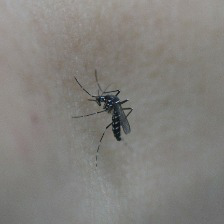

In [69]:
PILImage.create(test_img2)

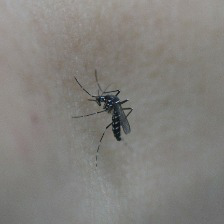

In [70]:
Image.open(test_img2).to_thumb(256,256)

In [71]:
is_landed,_,probs = learner.predict(PILImage.create(test_img2))

In [72]:
print(f"This is a : {is_landed}" )
print(f"Probability it's : {probs[0]: .4f}")

This is a : albopictus landing
Probability it's :  1.0000


## Image 3

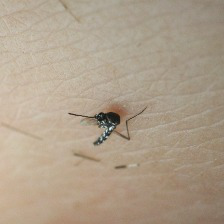

In [73]:
Image.open(test_img3).to_thumb(256,256)

In [76]:
is_landed,_,probs = learner.predict(PILImage.create(test_img3))
print(probs)
indx = np.argmax((probs),axis=0).tolist()
print(f"This is a : {is_landed}" )
print(f"Probability it's : {probs[indx]: .4f}")

TensorBase([2.8686e-09, 1.0000e+00])
This is a : albopictus smashed
Probability it's :  1.0000


## Image 1

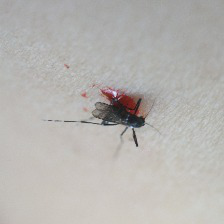

In [79]:
Image.open(test_img1).to_thumb(256,256)

In [77]:
is_landed,_,probs = learner.predict(PILImage.create(test_img1))
print(probs)
indx = np.argmax((probs),axis=0).tolist()
print(f"This is a : {is_landed}" )
print(f"Probability it's : {probs[indx]: .4f}")

TensorBase([1.9501e-11, 1.0000e+00])
This is a : albopictus smashed
Probability it's :  1.0000


## Image 1

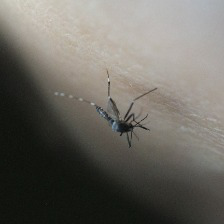

In [80]:
Image.open(test_img4).to_thumb(256,256)

In [81]:
is_landed,_,probs = learner.predict(PILImage.create(test_img4))
print(probs)
indx = np.argmax((probs),axis=0).tolist()
print(f"This is a : {is_landed}" )
print(f"Probability it's : {probs[indx]: .4f}")

TensorBase([1.0000e+00, 1.2795e-11])
This is a : albopictus landing
Probability it's :  1.0000
